<a href="https://colab.research.google.com/github/TLCasparS/PyTorch/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Workflow

### Resources:
* https://www.learnpytorch.io/01_pytorch_workflow/

* https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

1. data (prepare and load)
2. build model
3. fitting the model to data (training)
4. making predictions and evaluating a model (inference)
5. saving and loading a model
6. putting it all together


In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [1]:
import torch
from torch import nn
# nn: grundlegende Graph building blocks https://pytorch.org/docs/stable/nn.html

import numpy as np
import math

import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

# 1. Data Preparation
Data can be amlmost anything! 
* Text
* Audio 
* Photo
* Video
* DNA
* Excel spreadheet

### Machine learning has 2 Parts:
1. Turn data into number 
2. Build a model to learn patterns in numbers

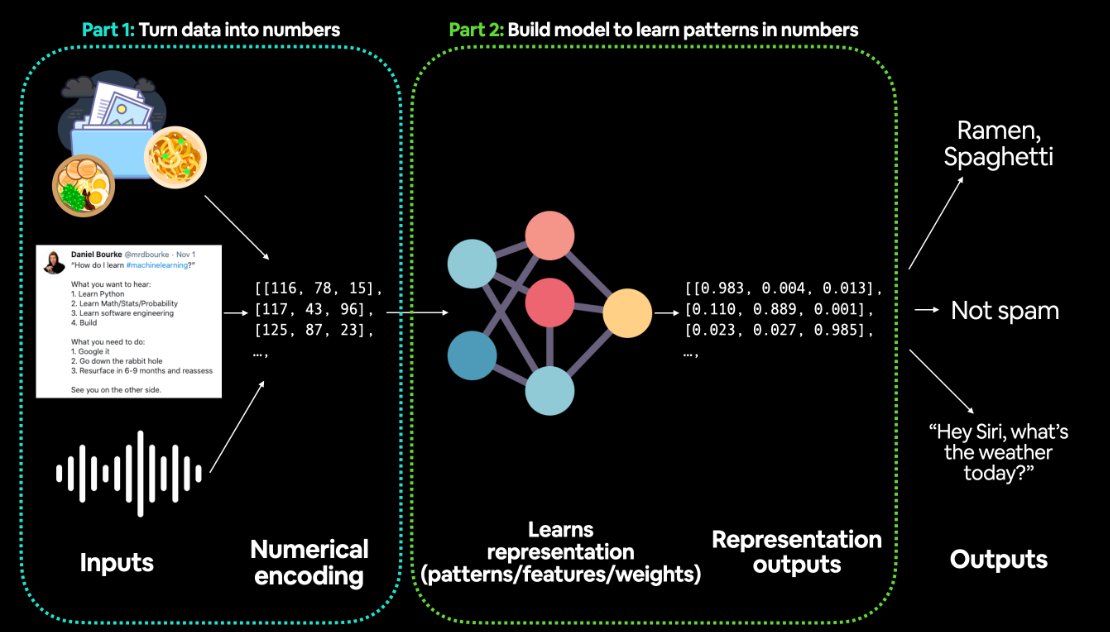

Um den Prozess zu zeigen, fangen wir mit bekannten Daten an zusammen mit einer Linearen Regression


In [11]:
# Create *known* parameters
#f(x) = ax + b
# wollen ein modell, das die Parameter vorhersagen kann
weight = 0.7 # b im neuralen Netzwerk
bias = 0.3 # a im neuralen Netzwerk

# 
start = 0
end = 1
step = 0.02 #gap
X = torch.arange(start, end, step).unsqueeze(dim=1) # die extra Dimension 1 brauchen wir später beim Modellieren!
y = weight * X + bias #ax +b

X[:10], y[:10], len(X), len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

wir wissen wie die Daten zusammenhängen: y = ax +b
Unser Ziel ist es aber ein Modell zu bauen, welches diesen Zusammenhang erkennt

Also ein Modell das versthet wie input (X) und output (y) zusammenhängen

### **Splitting data in training and test sets**  (one of the most important concepts of machine laerning in general!)

### Three Datatest

* **Training sets** wie Kursmaterial ~60-80%
* **Validation sets** wie Altklausern ~10-20% Wird oft aber nicht immer verwendet
* **test sets** wie Klausur (adapt to unseen material) ~10-20%

machen all das mit dem Ziel der **Generalization** : *Ability for a machine learning model to perfom well on data is has not been trained on*

Un darum splitten wir unsere Daten, zum trainieren  und validiern und schließlich zum testen

* **Training set**: The model learns from this data (like the course materials you study during the semester).
* **Validation set**: The model gets tuned on this data (like the practice exam you take before the final exam). *Wird oft aber nicht immer verwendet*
* **Testing set**: The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).


(the test set should always be kept separate from all other data). 

In [17]:
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] # alles bis zum train_split
X_test, y_test = X[train_split:],y[train_split:] # alles ab dem train_split

#gibt auch Methoden die das für uns machen z.B.: in sciKilt learn

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize it to understand better!
Data explores motto: "visualize, visualize, visualize!"

In [37]:


def plot_predicitons(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compare preditions
  """
  plt.figure(figsize =(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label ="Training data")
  
  plt.scatter(test_data, test_labels, c="g", s=4, label ="Testing data")
  
  if predictions is not None:
    # plot predictions if they exists:
    plt.scatter(test_data, predictions, c="r", s=4, label ="Predictions")
  
    # unsere Vorhersage werden gegen die Test Daten getestet! 
    # denn davor haben wir mit den training daten die trainiert und die predictions 
    # abgeleitet. Jetzt wird getestet, was das Modell kann!
  #Show legend
  plt.legend(prop={"size": 14})





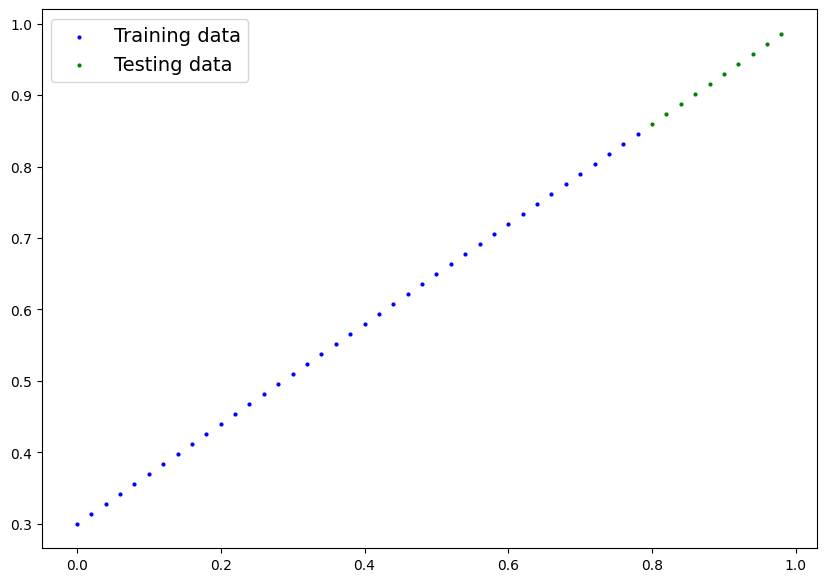

In [40]:
plot_predicitons()

## 2. Build model

our first Pytorch model!
